<a href="https://colab.research.google.com/github/JAlonMor/Webscraping/blob/main/EDA_coches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
# Clonar repositorio de GitHub si no está disponible

import os
curr_dir = os.getcwd()

if not os.path.exists(os.path.join(curr_dir, '../.ROOT_DIR')):
  !git clone https://github.com/JAlonMor/Webscraping.git
  os.chdir(os.path.join(curr_dir, 'Webscraping/EDA'))



Cloning into 'Webscraping'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 68 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


In [276]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Amplio límtes de visualización
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200

In [277]:
# Creo DataFrame a partir de los datos obtenidos mediante web scraping

coches = pd.read_csv("/content/Webscraping/EDA/coches_net.csv")

In [278]:
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1.0,Baleares,False,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1.0,Badajoz,True,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estate 5p.,11000,287500,2015,1.0,Valladolid,False,/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1.0,Valencia,True,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4.0,Cádiz,True,/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx


In [279]:
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   titulo       1927 non-null   object 
 1   precio       1927 non-null   int64  
 2   kilometros   1927 non-null   int64  
 3   año          1927 non-null   int64  
 4   combustible  1925 non-null   float64
 5   ciudad       1927 non-null   object 
 6   garantia     1927 non-null   bool   
 7   url          1927 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 107.4+ KB


In [280]:
coches[['precio', 'kilometros', 'año', 'combustible']].describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1927.0,32102.315516,11780.078836,7500.0,24900.0,29000.0,36500.0,104900.0
kilometros,1927.0,88266.961598,55860.716656,1.0,45000.0,82785.0,120000.0,366000.0
año,1927.0,2017.110535,1.819682,2014.0,2016.0,2017.0,2018.0,2022.0
combustible,1925.0,1.400000,0.902180,1.0,1.0,1.0,1.0,5.0


## Limpieza

In [281]:
# Tenemos dos valores nulos en la variable combustible

coches[coches.combustible.isnull()]

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
416,MERCEDES-BENZ Clase C 5p.,28500,150000,2015,NaN,Guipúzcoa,False,/mercedes-benz-clase-c--5p-otros-2015-en-guipuzcoa-51760617-covo.aspx
1566,MERCEDES-BENZ,33300,34400,2017,NaN,Murcia,False,/mercedes-benz-clase-c--5p-otros-2017-en-murcia-51484724-covo.aspx


In [282]:
# Al ser solo dos observaciones, trataré de solucionarlo manualmente. Veamos las URL

coches.iloc[416,:].url

'/mercedes-benz-clase-c--5p-otros-2015-en-guipuzcoa-51760617-covo.aspx'

Es un híbrido diésel (4)

In [283]:
coches.iloc[1566,:].url

'/mercedes-benz-clase-c--5p-otros-2017-en-murcia-51484724-covo.aspx'

Es un híbrido enchufable (gasolina) (5)

In [284]:
coches.combustible.unique()

array([ 1.,  4.,  2.,  5., nan])

Códigos de los diferentes combustibles

* 1 $\rightarrow$ Diésel
* 2 $\rightarrow$ Gasolina
* 4 $\rightarrow$ Híbrido
* 5 $\rightarrow$ Híbrido enchufable


In [285]:
coches.iloc[416,:].combustible = 4.0
coches.iloc[1566,:].combustible = 5.0

In [286]:
coches.iloc[416,4] = 4.0
coches.iloc[1566,4] = 5.0

In [287]:
coches[coches.combustible.isnull()]

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url


In [288]:
# Ahora cambio el tipo de variable a entero (combustible)
coches['combustible'] = coches['combustible'].astype(int)
coches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   titulo       1927 non-null   object
 1   precio       1927 non-null   int64 
 2   kilometros   1927 non-null   int64 
 3   año          1927 non-null   int64 
 4   combustible  1927 non-null   int64 
 5   ciudad       1927 non-null   object
 6   garantia     1927 non-null   bool  
 7   url          1927 non-null   object
dtypes: bool(1), int64(4), object(3)
memory usage: 107.4+ KB


In [289]:
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1,Baleares,False,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1,Badajoz,True,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estate 5p.,11000,287500,2015,1,Valladolid,False,/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1,Valencia,True,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4,Cádiz,True,/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx


## EDA

Transformaciones a realizar:

Sacar más información de las columnas "titulo" y "url"
Crear nueva columna con url completa añadiendo la url base de coches.net
Crear otra variable con las coordenadas de cada ciudad
Crear variable con max-min de kilometros (el escalado se hace con los datos de entrenamiento creo)
Crear variable con la antigüedad de cada coche: now-año
Crear variable dummy con el combustible

Buscar outliers en las variables, boxplot
Realizar estudios de distribuciones de las variables
Estudio de la correlaciones entre las variables.
Estudio de las correlaciones con la variable objetivo "precio"
Hacer gráfico con mapa con las posiciones de las ciudades donde se venden los coches.
Usar métodos de filtrado para regesion, f_regression y mutual_info_regession. F-test score y Mutual information




### TRANSFORMACIONES<br/>



* [X] Garantía de bool a 1,0
* [X] Poner URL completa
* [X] Extraer más información de "titulo" y "url"
* [X] Coordenadas GPS de ciudades
* [X] Crear nueva variable con la antigüedad del coches en años. Escalar.
* [X] Variables binarias para combustible
* [X] Crear archivo de salida para modelar



### ANALISIS Y EXPLORACIONES

* [X] Box plot de caracterísitcas.
* [X] Análisis por agrupación de ciudades.
* [X] Estudio de las distintas distribuciones.
* [X] Estudio de correlaciones entre las variables.
* [X] Estudio de correlaciones entre las variables y "precio".
* [X] Estudio según localización GPS.

## Transformaciones

### Pasar variable garantía a 0,1

In [290]:
  coches['garantia'] = np.where((coches['garantia'] == True), 1, 0)


### Poner URL completa

In [291]:
# Creamos URL completa
from urllib.parse import urljoin

url_base = "https://www.coches.net/"
coches['web'] = [urljoin(url_base, url) for url in coches['url']]

In [292]:
# Compruebo
coches.web[0]

'https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx'

### Extraer información de "titulo" y de "url"

In [293]:
print(coches.loc[[0],['titulo']])
print(coches.loc[[0],['url']]) ##, 'url']]),

                              titulo
0  MERCEDES-BENZ Clase C C 220 d 4p.
                                                                            url
0  /mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx


In [294]:
coches.sample(5)

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web
93,MERCEDES-BENZ Clase C Cabrio C 200 2p.,44500,8800,2020,4,Valencia,1,/mercedes-benz-clase-c-cabrio-c-200-2p-electrico-hibrido-2020-en-valencia-51764314-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-cabrio-c-200-2p-electrico-hibrido-2020-en-valencia-51764314-covo.aspx
1044,MERCEDES-BENZ Clase C C Coupe 220 d 2p.,33900,109100,2017,1,Asturias,1,/mercedes-benz-clase-c-c-coupe-220-d-2p-diesel-2017-en-asturias-51496032-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-coupe-220-d-2p-diesel-2017-en-asturias-51496032-covo.aspx
873,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1,Baleares,0,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx
1815,MERCEDES-BENZ Clase C C Coupe 220 d AMG Line 2p.,26900,120000,2016,1,Castellón,0,/mercedes-benz-clase-c-c-coupe-220-d-amg-line-2p-diesel-2016-en-castellon-50380084-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-coupe-220-d-amg-line-2p-diesel-2016-en-castellon-50380084-covo.aspx
1902,MERCEDES-BENZ Clase C C 300 de 4p.,41650,19245,2020,5,Álava,0,/mercedes-benz-clase-c-c-300-de-4p-electrico-hibrido-2020-en-alava-50439289-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-300-de-4p-electrico-hibrido-2020-en-alava-50439289-covo.aspx


In [295]:
import regex as re

Crear nueva variable "tipo", con tipo de modelo clase C que es el coche. En caso no obtener esa información, identificar con la palabra "NoInfo"

In [296]:
coches['tipo'] = coches['url'].str.extract('-(\d{2,3})-').fillna('NoInfo')

In [297]:
coches.tipo.sample(10)

1196       220
962        200
261        220
1626       220
1421       220
407        200
1882    NoInfo
920         63
1593       220
1419       220
Name: tipo, dtype: object

In [298]:
coches.value_counts('tipo')

tipo
220       1092
200        279
NoInfo     132
250        111
63          76
300         71
43          69
180         56
350         33
450          4
400          3
45           1
dtype: int64

Crear nueva variable booleana, indicango si el vehículo tiene el acabado AMG True o no False

In [299]:
coches['AMG'] = 0
coches.loc[coches.url.str.contains('amg', case=True),'AMG'] = 1

In [300]:
coches.value_counts('AMG')

AMG
0    1521
1     406
dtype: int64

### Coordenadas GPS de ciudades

Creo una función para obtener las coordenadas de la cada ciudad

In [301]:
def get_coordinates(cities):
  '''
  Given the column name with the cities, get coordinates for every city in two
  differents columns, "lat_ciudad" and "lat_ciudad" in a new DF
  '''
  
  from geopy.geocoders import Nominatim

  geolocator = Nominatim(user_agent="MyApp")
  ciudades = coches[cities].value_counts().index.tolist()

  lat_ciudad = []
  long_ciudad = []

  for ciudad in ciudades:
    location = geolocator.geocode(ciudad) 
    lat_ciudad.append(location.latitude)
    long_ciudad.append(location.longitude)

  df_ciudades = pd.DataFrame(list(zip(ciudades, lat_ciudad, long_ciudad)), columns =['ciudad', 'lat_ciudad', 'long_ciudad'])

  return df_ciudades



In [302]:
df_ciudades = get_coordinates('ciudad')

Ahora uno los dos dataframe para tener cada coordenada con cada ciudad de la tabla "coches"

In [303]:
coches = pd.merge(coches, df_ciudades, on = 'ciudad', how = 'left')
coches.head()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web,tipo,AMG,lat_ciudad,long_ciudad
0,MERCEDES-BENZ Clase C C 220 d 4p.,16200,281000,2017,1,Baleares,0,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-baleares-51618684-covo.aspx,220,0,39.613432,2.880354
1,MERCEDES-BENZ Clase C C 220 d Estate 5p.,26900,114336,2017,1,Badajoz,1,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-badajoz-50946817-covo.aspx,220,0,38.878059,-6.970205
2,MERCEDES-BENZ Clase C C 220 d Avantgarde Estate 5p.,11000,287500,2015,1,Valladolid,0,/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-avantgarde-estate-5p-diesel-2015-en-valladolid-51386008-covo.aspx,220,0,41.652133,-4.728562
3,MERCEDES-BENZ Clase C C 220 d Avantgarde 4p.,22900,110000,2015,1,Valencia,1,/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-avantgarde-4p-diesel-2015-en-valencia-51457158-covo.aspx,220,0,39.469707,-0.376335
4,MERCEDES-BENZ Clase C C 300 d 4p.,68000,10650,2021,4,Cádiz,1,/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-300-d-4p-electrico-hibrido-2021-en-cadiz-51662564-covo.aspx,300,0,36.529744,-6.292898


### Crear nueva variable con la antigüedad del coches en años. Escalar.

Restar la fecha actual a la columna año para obtener los años del coches

In [304]:
from datetime import datetime

now = datetime.now().year
coches['años'] = now - coches['año']

In [305]:
coches.sample()

,titulo,precio,kilometros,año,combustible,ciudad,garantia,url,web,tipo,AMG,lat_ciudad,long_ciudad,años
1274,MERCEDES-BENZ Clase C MercedesAMG C 43 4MATIC 4p.,49750,28636,2018,2,Sevilla,1,/mercedes-benz-clase-c-mercedesamg-c-43-4matic-4p-gasolina-2019-en-sevilla-51611259-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-mercedesamg-c-43-4matic-4p-gasolina-2019-en-sevilla-51611259-covo.aspx,43,1,37.38863,-5.99534,4


### Variables binarias para combustible y tipo

Crear variables con el tipo de combustible

In [306]:
# Usar dummies variables para generar las columnas binarias
# Eliminamos primera columna "combustible_1", por lo que si el resto valen 0, quiere decir que se trata de
# coche con combustible tipo 1 (diésel)
coches['tipo_combustible'] = coches['combustible']
coches['modelo_tipo'] = coches['tipo']
coches = pd.get_dummies(coches, prefix = 'combustible', columns = ['combustible'], drop_first = True)
coches = pd.get_dummies(coches, prefix = 'tipo', columns = ['tipo'], drop_first = True)
coches.sample(1)

,titulo,precio,kilometros,año,ciudad,garantia,url,web,AMG,lat_ciudad,long_ciudad,años,tipo_combustible,modelo_tipo,combustible_2,combustible_4,combustible_5,tipo_200,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo
807,MERCEDES-BENZ Clase C Coupe C 300 2p.,44350,57249,2018,Vizcaya,1,/mercedes-benz-clase-c-coupe-c-300-2p-gasolina-2019-en-vizcaya-51717136-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-coupe-c-300-2p-gasolina-2019-en-vizcaya-51717136-covo.aspx,0,43.238482,-2.851632,4,2,300,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Crear nuevas variables para identificar la carrocería a partir del número de puertas.

* 2-3 $\rightarrow$ Coupé-Cabrio
* 4 $\rightarrow$ Berlina
* 5 $\rightarrow$ Estate (portón)


In [307]:
# Buscar texto entre  dos o tres digitos (220,63, ...) y el final de la frase, (4|5)p. (4p. o 5p.)
# Extrae numero de puertas de 2,3,4p.

coches['puertas'] =  coches['titulo'].str.extract('(\d{1})p.').fillna('NoInfo')
coches.value_counts('puertas')

puertas
4         859
5         577
2         402
NoInfo     87
3           2
dtype: int64

In [308]:
# Creamos variables dummies para puertas = carroceria

coches['n_puertas'] = coches['puertas']
coches = pd.get_dummies(coches, prefix = 'puertas', columns = ['puertas'], drop_first = True)
coches.sample(1)

,titulo,precio,kilometros,año,ciudad,garantia,url,web,AMG,lat_ciudad,long_ciudad,años,tipo_combustible,modelo_tipo,combustible_2,combustible_4,combustible_5,tipo_200,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo,n_puertas,puertas_3,puertas_4,puertas_5,puertas_NoInfo
1431,MERCEDES-BENZ Clase C C 220 d 4p.,23990,99000,2017,Sevilla,1,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-sevilla-51136675-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-sevilla-51136675-covo.aspx,0,37.38863,-5.99534,5,1,220,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0


Crear nuevas varibles con el resto de información relevante que encontramos en la información.

1.   4MATIC
2.   Avantgarde
3.   BlueTEC 
4.   Sportive 
5.   Exclusive
6.   S Edition
7.   d Edition



In [309]:
# extraigo información
coches['acabado'] =  coches['titulo'].str.extract('\d{2,3}(.*)\s\d{1}p.').fillna('NoInfo')

# Creo nuevas columnas con las características a completar
acabados = ['4MATIC', 'Avantgarde', 'BlueTEC', 'Sportive', 'Exclusive', 'S Edition', 'd Edition']

for _ in acabados:
  coches[_] = False

# Añado columnas con nombres de los acabados, indicando con True o False si poseen ese acabado
for each in acabados:
  coches[each] = np.where((coches.acabado.str.contains(each)), 1, 0)

# Verifico
coches.sample(5)

,titulo,precio,kilometros,año,ciudad,garantia,url,web,AMG,lat_ciudad,long_ciudad,años,tipo_combustible,modelo_tipo,combustible_2,combustible_4,combustible_5,tipo_200,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo,n_puertas,puertas_3,puertas_4,puertas_5,puertas_NoInfo,acabado,4MATIC,Avantgarde,BlueTEC,Sportive,Exclusive,S Edition,d Edition
378,MERCEDES-BENZ Clase C C 220 d 4p.,32995,89055,2018,Valencia,1,/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-valencia-51762896-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4p-diesel-2017-en-valencia-51762896-covo.aspx,0,39.469707,-0.376335,4,1,220,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,d,0,0,0,0,0,0,0
1453,MERCEDES-BENZ Clase C C 220 d Estate 5p.,27900,115719,2017,Navarra,1,/mercedes-benz-clase-c-c-220-d-4matic-estate-5p-diesel-2018-en-navarra-51060691-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4matic-estate-5p-diesel-2018-en-navarra-51060691-covo.aspx,0,42.612549,-1.830788,5,1,220,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,1,0,d Estate,0,0,0,0,0,0,0
1495,MERCEDES-BENZ Clase C C 350 e 4p.,33500,43100,2017,Madrid,1,/mercedes-benz-clase-c-c-350-e-4p-electrico-hibrido-2017-en-madrid-51510710-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-350-e-4p-electrico-hibrido-2017-en-madrid-51510710-covo.aspx,0,40.416705,-3.703582,5,5,350,0,0,1,0,0,0,0,1,0,0,0,0,0,0,4,0,1,0,0,e,0,0,0,0,0,0,0
715,MERCEDES-BENZ Clase C C 220 d Estate 5p.,25490,95290,2017,Barcelona,1,/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-barcelona-51491671-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-estate-5p-diesel-2017-en-barcelona-51491671-covo.aspx,0,41.382894,2.177432,5,1,220,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,1,0,d Estate,0,0,0,0,0,0,0
798,MERCEDES-BENZ Clase C C 180 AVANTGARDE 4p.,22900,112845,2016,Madrid,1,/mercedes-benz-clase-c-c-180-avantgarde-4p-gasolina-2015-en-madrid-51718836-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-180-avantgarde-4p-gasolina-2015-en-madrid-51718836-covo.aspx,0,40.416705,-3.703582,6,2,180,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,AVANTGARDE,0,0,0,0,0,0,0


In [310]:
# Elimino columna intermedia "acabado"
coches = coches.drop('acabado', axis = 1)

Salvaguardar DataFrame

In [311]:
coches_copy = coches.copy()

## Análisis

### Box plot de características.

Mostrar varibles categóricas en diagramas de caja y bigotes

<Figure size 1440x1440 with 0 Axes>

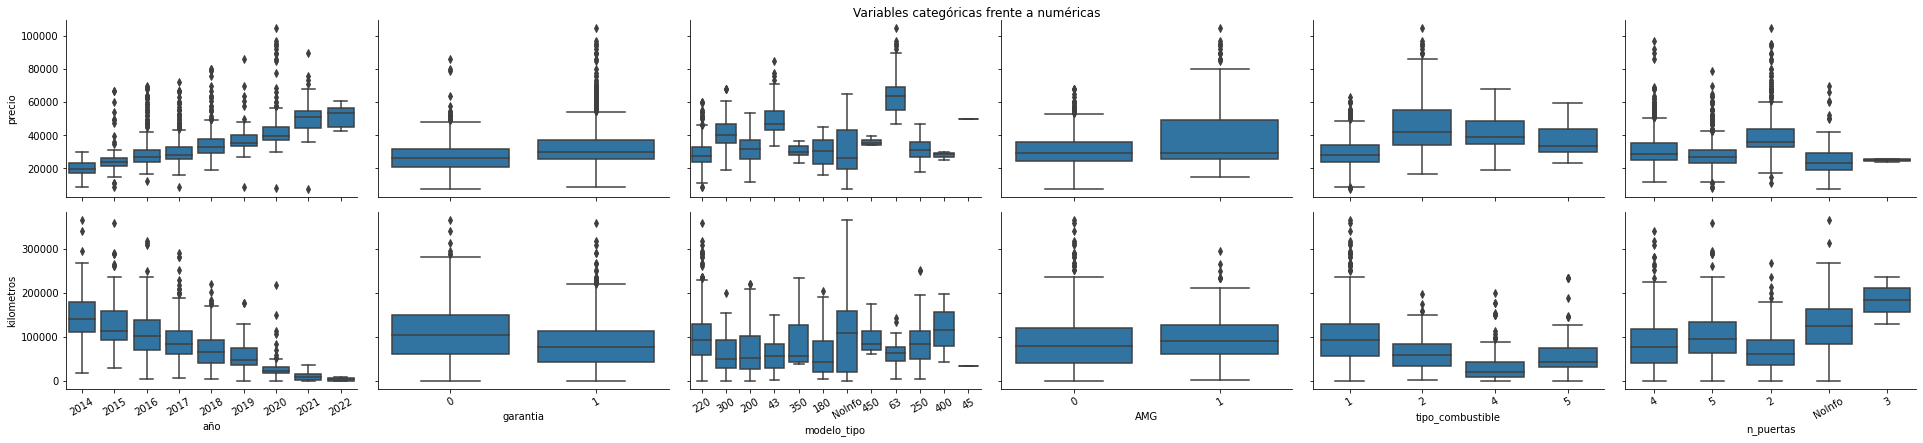

In [312]:
# Function from the example of the course. (Thaks to the author).
# Codigo utilizado durante la formación recibida por "Udacity"
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 30)
    
# Plotting the graph
plt.figure(figsize = [20, 20])
g = sns.PairGrid(data = coches, y_vars = ['precio', 'kilometros'], 
                x_vars = ['año', 'garantia', 'modelo_tipo', 'AMG', 'tipo_combustible', 'n_puertas'], height = 3, aspect = 1.5)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Variables categóricas frente a numéricas')
g.map(boxgrid)
plt.show();

### Análisis por agrupación

Analizar media y mediana de precios por ciudad

In [313]:
# Agrupar datos
coches_city_price_mean = coches.groupby('ciudad')['precio'].mean().reset_index()
coches_city_price_median = coches.groupby('ciudad')['precio'].median().reset_index()

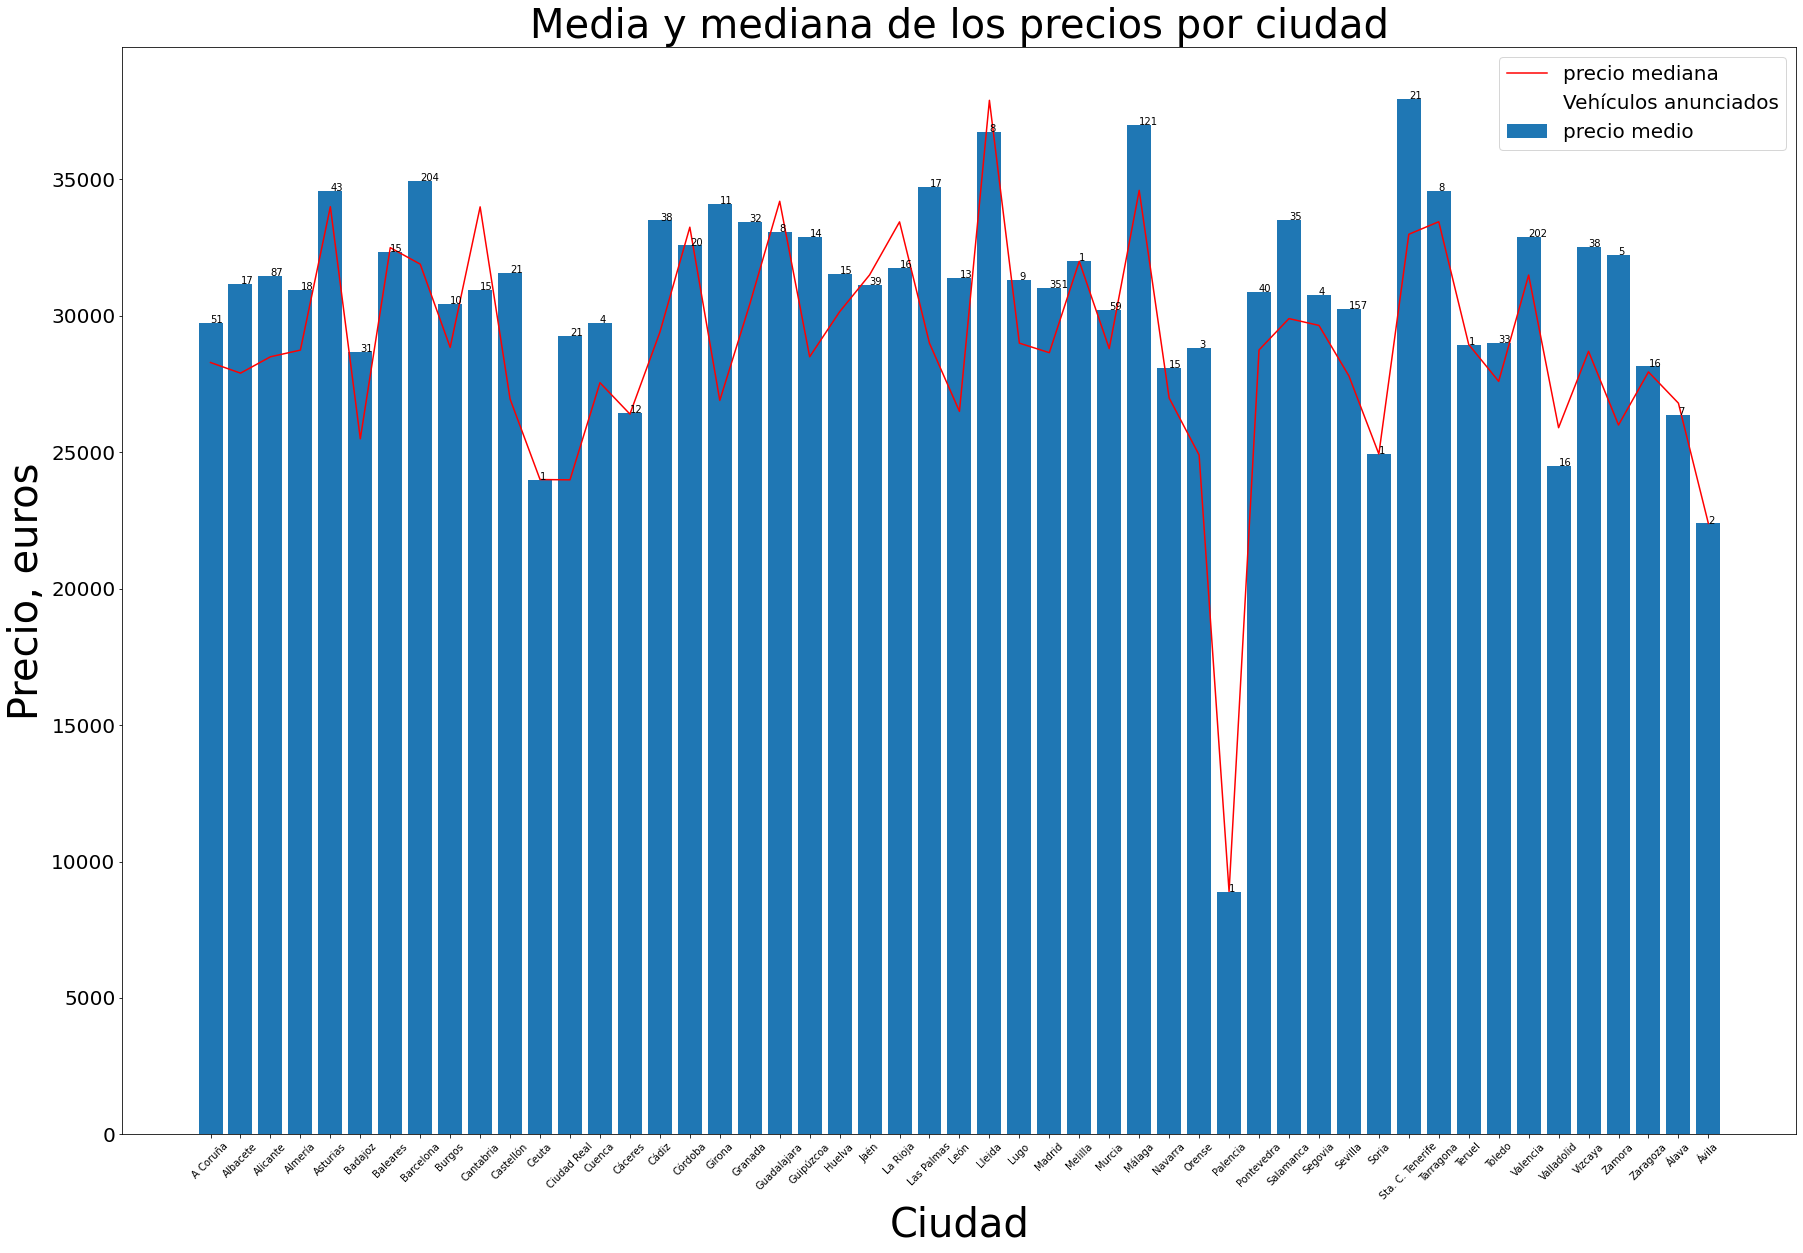

In [314]:
# Crear gráfico
plt.figure(figsize = (30,20))
bars_precio = plt.bar(coches_city_price_mean.ciudad,coches_city_price_mean.precio, label = 'precio medio')
median_precio = plt.plot(coches_city_price_median.ciudad, coches_city_price_median.precio, color = 'red', label = 'precio mediana')
plt.plot([], [], ' ', label="Vehículos anunciados")
plt.tick_params(axis = 'x',labelrotation = 45, labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 20)
plt.ylabel('Precio, euros',fontdict = {'fontsize': 40})
plt.xlabel('Ciudad',fontdict = {'fontsize': 40})
plt.title('Media y mediana de los precios por ciudad',fontdict = {'fontsize': 40},pad = 0)
plt.legend(prop = {'size': 20})


# Añado texto en cada barra con el número de unidades por ciudad
nCiudad = coches.value_counts('ciudad').reset_index()
nCiudad = nCiudad.sort_values('ciudad')
x = coches_city_price_mean.ciudad
y = coches_city_price_mean.precio
n = nCiudad[0]
for x, y, n in zip(x, y, n):
   plt.text(x, y, n)

plt.show();

### Estudio de las distintas distribuciones.

Distribución de la variable precio

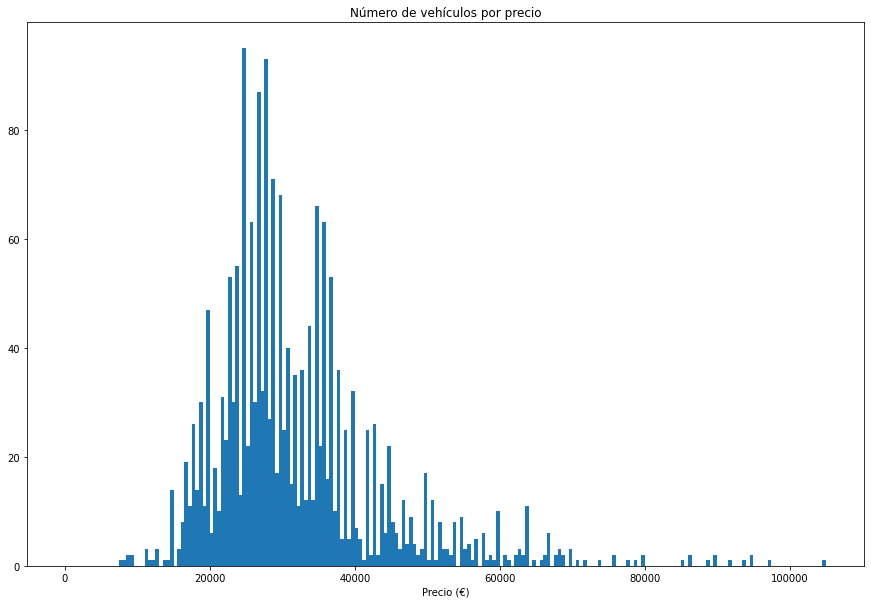

In [315]:
# Creando el histograma
binsize = 500
bins = np.arange(0, coches['precio'].max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = coches, x = 'precio', bins = bins)
plt.xlabel('Precio (€)')
plt.title('Número de vehículos por precio')
plt.show();

Distribución de la variable kilómetros

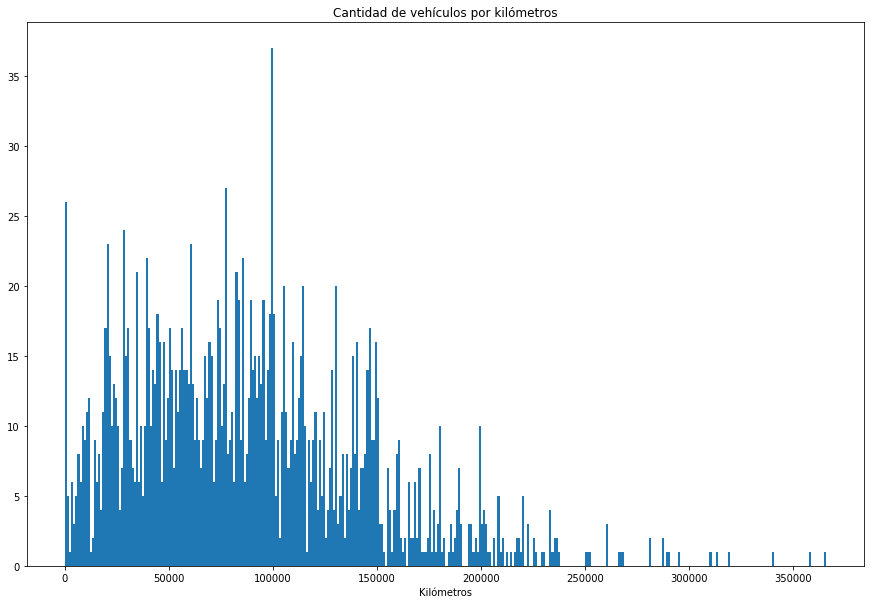

In [316]:
# Creando el histograma
binsize = 1000
bins = np.arange(0, coches['kilometros'].max()+binsize, binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = coches, x = 'kilometros', bins = bins)
plt.xlabel('Kilómetros')
plt.title('Cantidad de vehículos por kilómetros')
plt.show();

### Estudio de correlaciones entre las variables.

In [317]:
## Poner matriz de correlación con heatmap

In [318]:
numeric_vars = ['precio', 'kilometros', 'lat_ciudad', 'long_ciudad', 'años']
categorical_vars = ['precio','modelo_tipo', 'tipo_combustible', 'n_puertas']

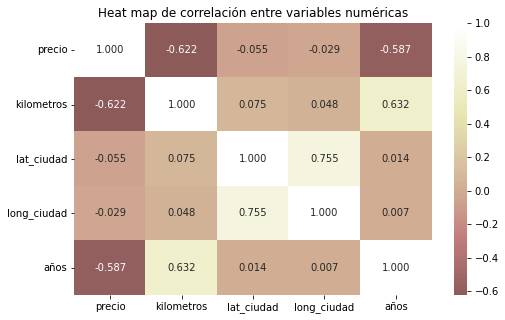

In [319]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(coches[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'pink', center = 0)

plt.title('Heat map de correlación entre variables numéricas')
plt.show();

### Estudio de correlaciones entre las variables y "precio"

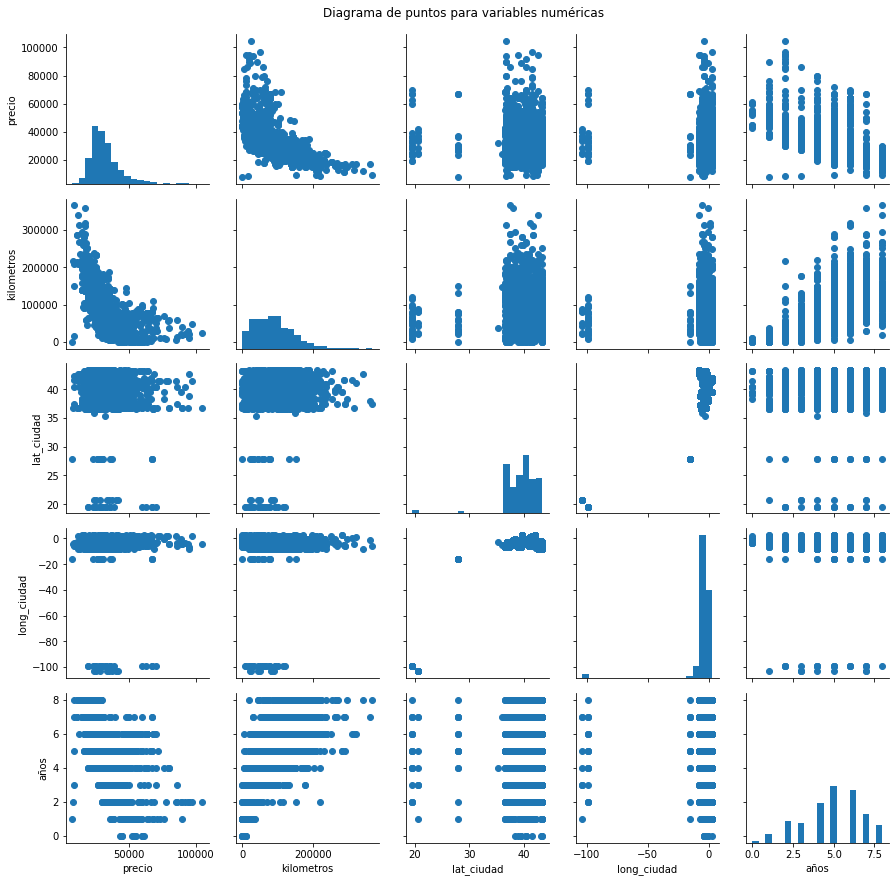

In [320]:
# Scatter plot
g = sns.PairGrid(data = coches, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Diagrama de puntos para variables numéricas')
g.map_offdiag(plt.scatter);

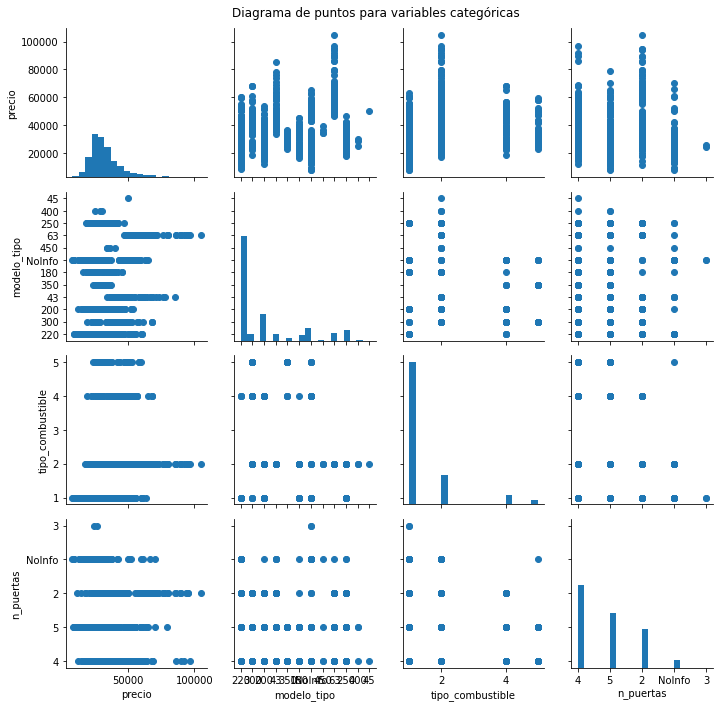

In [321]:
# categorical_vars y precio

# Scatter plot
g = sns.PairGrid(data = coches, vars = categorical_vars)
g = g.map_diag(plt.hist, bins = 20)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Diagrama de puntos para variables categóricas')
g.map_offdiag(plt.scatter);

### Estudio según localización GPS

In [322]:
fig = px.scatter_geo(coches,lat='lat_ciudad',lon='long_ciudad', hover_name="ciudad")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [323]:
# Descubrimos que Guadalajara es incorrecto en las coordenadas
# Quito información de Guadalajara, Sta. Cruz de Tenerife y Las Palmas para comparar de nuevo PairGrid

In [324]:
coches_check_GPS = coches[~((coches['ciudad'] == 'Guadalajara') | (coches['ciudad'] == 'Sta. C. Tenerife') | (coches['ciudad'] == 'Las Palmas'))]

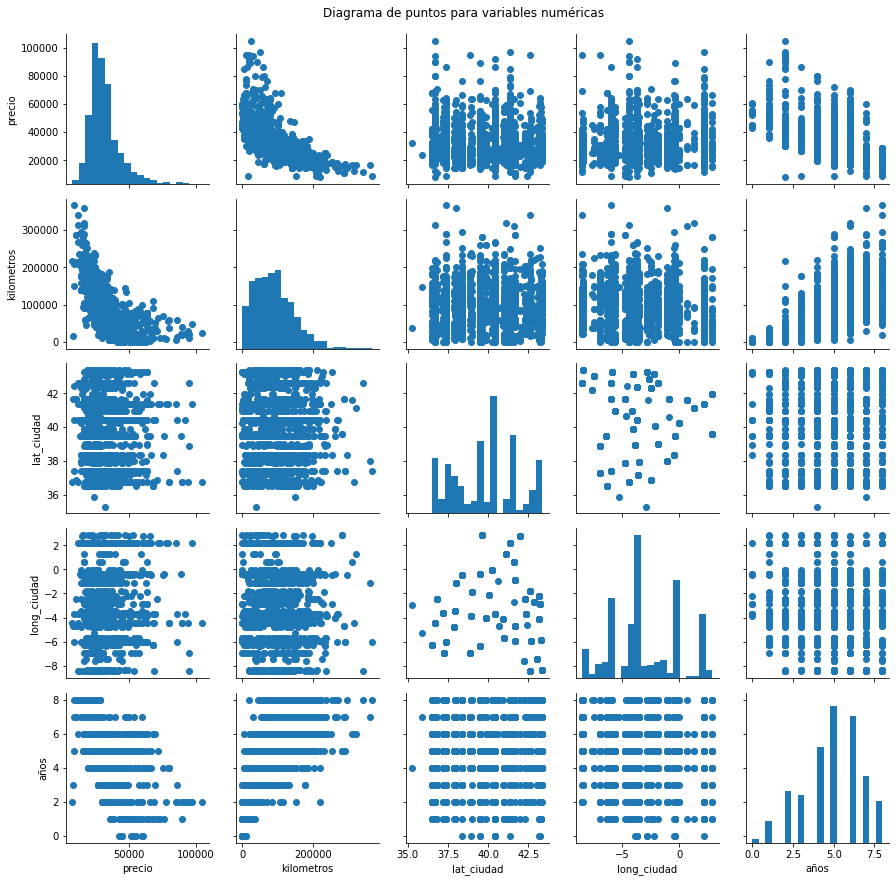

In [325]:
# Scatter plot
g = sns.PairGrid(data = coches_check_GPS, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)

g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Diagrama de puntos para variables numéricas')
g.map_offdiag(plt.scatter);

No se observa ninguna relación significativa entre las coordenadas de las ciudades y el precio de lo vehículos del estudio.

### Crear archivo de salida para modelar

Adecuar nombres de columnas a variables

In [326]:
coches = coches.rename(columns = {'combustible_2':'gasolina', 'combustible_4':'hibrido'
                                  , 'combustible_5':'hib_enchufable', 'puertas_3':'coupe'
                                  , 'puertas_4': 'berlina', 'puertas_5':'ranchera'
                                  , 'S Edition': 'S_Edition', 'd Edition': 'd_Edition'})

Seleccionar variables de interés para proceder a la etapa de modelado de regresión

In [327]:
coches.sample()

,titulo,precio,kilometros,año,ciudad,garantia,url,web,AMG,lat_ciudad,long_ciudad,años,tipo_combustible,modelo_tipo,gasolina,hibrido,hib_enchufable,tipo_200,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo,n_puertas,coupe,berlina,ranchera,puertas_NoInfo,4MATIC,Avantgarde,BlueTEC,Sportive,Exclusive,S_Edition,d_Edition
44,MERCEDES-BENZ Clase C C 220 d 4MATIC Sportive AMG 4p.,28500,53695,2016,Toledo,1,/mercedes-benz-clase-c-c-220-d-4matic-sportive-amg-4p-diesel-2016-en-toledo-51652783-covo.aspx,https://www.coches.net/mercedes-benz-clase-c-c-220-d-4matic-sportive-amg-4p-diesel-2016-en-toledo-51652783-covo.aspx,1,39.856068,-4.023957,6,1,220,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,1,0,0,1,0,0,0


In [328]:
var_model = ['precio', 'kilometros', 'garantia', 'AMG', 'años'
            , 'gasolina', 'hibrido', 'hib_enchufable'
            , 'tipo_200', 'tipo_220', 'tipo_250'
            , 'tipo_300', 'tipo_350', 'tipo_400', 'tipo_43'
            , 'tipo_45', 'tipo_450', 'tipo_63', 'tipo_NoInfo'
            , 'coupe', 'berlina', 'ranchera', '4MATIC', 'Avantgarde', 'BlueTEC'
            , 'Sportive', 'Exclusive', 'S_Edition', 'd_Edition']

coches_model = coches[var_model]

In [329]:
coches_model.sample(5)

,precio,kilometros,garantia,AMG,años,gasolina,hibrido,hib_enchufable,tipo_200,tipo_220,tipo_250,tipo_300,tipo_350,tipo_400,tipo_43,tipo_45,tipo_450,tipo_63,tipo_NoInfo,coupe,berlina,ranchera,4MATIC,Avantgarde,BlueTEC,Sportive,Exclusive,S_Edition,d_Edition
1022,25699,47764,1,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1544,46500,84000,0,1,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1205,46990,85108,1,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1158,23990,86000,1,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
692,23900,83372,1,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0


In [330]:
coches_model.to_csv('/content/Webscraping/EDA/cochesEDA_Output.csv', index = False)